In [1]:
# !pip install MesoPy

In [2]:
from MesoPy import Meso

bounding_box = "-115, 38, -110, 40"
meso_token="4192c18707b848299783d59a9317c6e1"
m=Meso(meso_token)

In [3]:
time_start = "201806010800"  # June 1 2018 08:00 in format yyyymmddHHMM
time_s2    = "201806010900"  # June 1 2018 09:00 in format yyyymmddHHMM 
time_end   = "201907200900"  # June 20 2018 09:00 in format yyyymmddHHMM

vars='air_temp,relative_humidity,precip_accum,fuel_moisture'

In [4]:
meso_obss = m.timeseries(time_start, time_s2, bbox=bounding_box, 
                             showemptystations = '0', vars=vars)

In [5]:
stns=len(meso_obss["STATION"]) # number of stations in query

for i in range(0, stns):
    if(len(meso_obss["STATION"][i]["SENSOR_VARIABLES"])==5):
        print(str(i)+': '+meso_obss["STATION"][i]["STID"])

# for i in range(0, stns):
#     print(str(i)+': '+
#           meso_obss["STATION"][i]["STID"]+", nvars:"+
#           str(len(meso_obss["STATION"][i]["SENSOR_VARIABLES"])))

38: BKCU1
44: HSRU1
46: JVAU1
58: TR123
62: TR421
121: TT084
130: TT143
131: TT156


In [6]:
station=meso_obss['STATION'][38]
lon,lat = (float(station['LONGITUDE']),float(station['LATITUDE']))
print(station['NAME'],'station',station['STID'],'at',lon,lat)
e = 0.01   # tolerance
bb = '%s, %s, %s, %s' % (lon - e, lat - e, lon + e, lat + e)
meso_ts = m.timeseries(time_start, time_end, bbox=bb, showemptystations = '0', vars=vars)   # ask the object for data

BLACK CEDAR station BKCU1 at -112.238864 38.979242


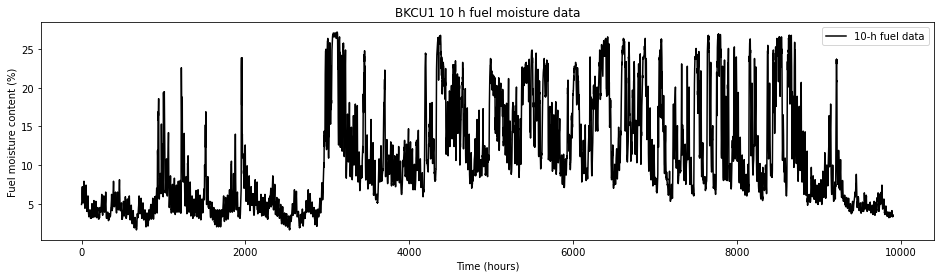

In [7]:
from datetime import datetime, timedelta, time
import numpy as np
import matplotlib.pyplot as plt
import pytz
station = meso_ts['STATION'][0]
time_str  = station['OBSERVATIONS']['date_time']
obs_time = [datetime.strptime(t, '%Y-%m-%dT%H:%M:%SZ').replace(tzinfo=pytz.UTC) for t in time_str]
start_time = obs_time[0].replace(minute=0)     # remember obs_time and start_time for later
end_time = obs_time[-1]
obs_data = np.array(station['OBSERVATIONS']["fuel_moisture_set_1"])


%matplotlib inline
plt.figure(figsize=(16,4))
plt.plot(obs_data,linestyle='-',c='k',label='10-h fuel data')
plt.title(station['STID'] + ' 10 h fuel moisture data')
plt.xlabel('Time (hours)') 
plt.ylabel('Fuel moisture content (%)')
plt.legend()

Text(0, 0.5, 'Relative Humidity (%)')

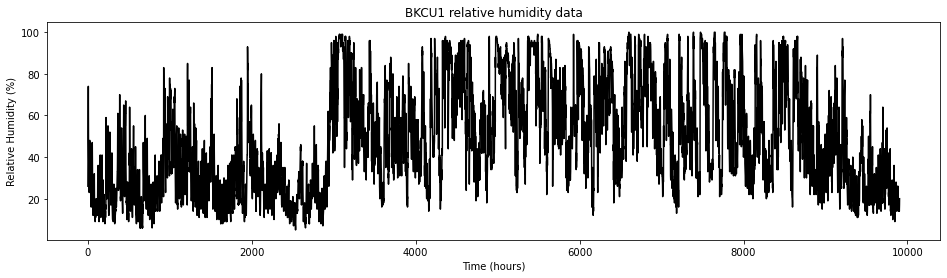

In [8]:
obs_data = np.array(station['OBSERVATIONS']["relative_humidity_set_1"])


%matplotlib inline
plt.figure(figsize=(16,4))
plt.plot(obs_data,linestyle='-',c='k')
plt.title(station['STID'] + ' relative humidity data')
plt.xlabel('Time (hours)') 
plt.ylabel('Relative Humidity (%)')

Text(0, 0.5, 'Precipitation Accumulated (mm)')

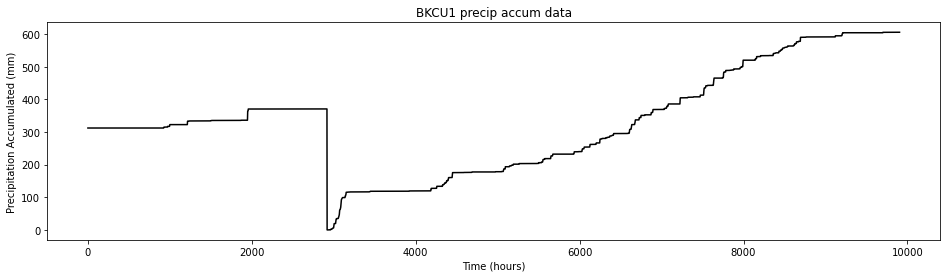

In [9]:
obs_data = np.array(station['OBSERVATIONS']["precip_accum_set_1"])


%matplotlib inline
plt.figure(figsize=(16,4))
plt.plot(obs_data,linestyle='-',c='k')
plt.title(station['STID'] + ' precip accum data')
plt.xlabel('Time (hours)') 
plt.ylabel('Precipitation Accumulated (mm)')

Text(0, 0.5, 'Air Temp (C)')

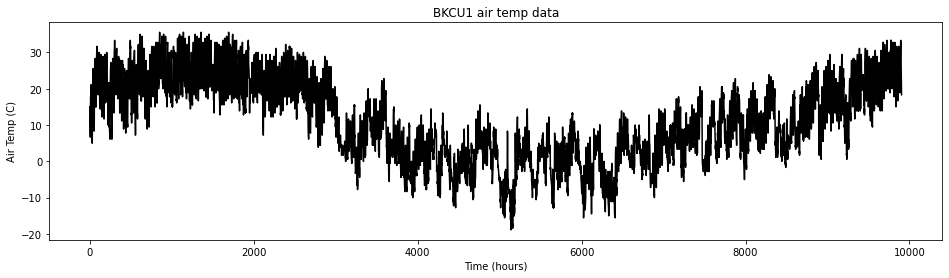

In [10]:
obs_data = np.array(station['OBSERVATIONS']["air_temp_set_1"])


%matplotlib inline
plt.figure(figsize=(16,4))
plt.plot(obs_data,linestyle='-',c='k')
plt.title(station['STID'] + ' air temp data')
plt.xlabel('Time (hours)') 
plt.ylabel('Air Temp (C)')